In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import geoplot as gplt
import contextily as ctx
import requests

In [4]:
# General settings
pd.options.display.max_columns = None
%matplotlib inline
#sns.set(style="darkgrid")
random_seed = 42

In [131]:
# Downloading data from PDOK for year of 2015
geodata_municipility_url = "https://geodata.nationaalgeoregister.nl/wijkenbuurten2015/wfs?request=GetFeature&service=WFS&version=2.0.0&typeName=gemeenten2015&outputFormat=json"
geodata_boroughs_url = "https://geodata.nationaalgeoregister.nl/wijkenbuurten2015/wfs?request=GetFeature&service=WFS&version=2.0.0&typeName=cbs_wijken_2015&outputFormat=json"
geodata = gpd.read_file(geodata_municipility_url).append(gpd.read_file(geodata_boroughs_url))

In [132]:
geodata.head(3)

,id,aantal_bedrijven_landbouw_bosbouw_visserij,aantal_bedrijven_nijverheid_energie,aantal_bedrijven_handel_en_horeca,aantal_bedrijven_vervoer_informatie_communicatie,aantal_bedrijven_financieel_onroerend_goed,aantal_bedrijven_zakelijke_dienstverlening,aantal_bedrijven_cultuur_recreatie_overige,aantal_bedrijfsvestigingen,aantal_personenautos_met_brandstof_benzine,aantal_personenautos_met_overige_brandstof,aantal_personenautos_jonger_dan_6_jaar,aantal_personenautos_6_jaar_en_ouder,aantal_personen_met_een_aow_uitkering_totaal,aantal_inkomensontvangers,aantal_inwoners,mannen,vrouwen,aantal_huishoudens,apotheek_gemiddelde_afstand_in_km,huisartsenpraktijk_gemiddelde_afstand_in_km,attractiepark_gemiddelde_afstand_in_km,bibliotheek_gemiddelde_afstand_in_km,bioscoop_gemiddelde_afstand_in_km,brandweerkazerne_gemiddelde_afstand_in_km,buitenschoolse_opvang_gem_afstand_in_km,cafe_gemiddelde_afstand_in_km,cafetaria_gemiddelde_afstand_in_km,winkels_ov_dagelijkse_levensm_gem_afst_in_km,hotel_gemiddelde_afstand_in_km,kunstijsbaan_gemiddelde_afstand_in_km,kinderdagverblijf_gemiddelde_afstand_in_km,basisonderwijs_gemiddelde_afstand_in_km,havo_vwo_gemiddelde_afstand_in_km,vmbo_gemiddelde_afstand_in_km,voortgezet_onderwijs_gem_afstand_in_km,oprit_hoofdverkeersweg_gemiddelde_afstand_in_km,overstapstation_gemiddelde_afstand_in_km,theater_gemiddelde_afstand_in_km,poppodium_gemiddelde_afstand_in_km,restaurant_gemiddelde_afstand_in_km,sauna_gemiddelde_afstand_in_km,grote_supermarkt_gemiddelde_afstand_in_km,treinstation_gemiddelde_afstand_in_km,warenhuis_gemiddelde_afstand_in_km,ziekenhuis_excl_buitenpolikliniek_gem_afst_in_km,ziekenhuis_incl_buitenpolikliniek_gem_afst_in_km,zonnebank_gemiddelde_afstand_in_km,zwembad_gemiddelde_afstand_in_km,aantal_personen_met_een_ao_uitkering_totaal,personenautos_per_huishouden,personenautos_per_km2,personenautos_totaal,huisartsenpraktijk_gemiddeld_aantal_binnen_1_km,buitenschoolse_opvang_gemiddeld_aantal_binnen_1_km,cafe_gemiddeld_aantal_binnen_1_km,cafetaria_gemiddeld_aantal_binnen_1_km,winkels_ov_dagel_levensm_gem_aantal_binnen_1_km,kinderdagverblijf_gemiddeld_aantal_binnen_1_km,basisonderwijs_aantal_binnen_1_km,restaurant_gemiddeld_aantal_binnen_1_km,grote_supermarkt_gemiddeld_aantal_binnen_1_km,bioscoop_gemiddeld_aantal_binnen_10_km,hotel_gemiddeld_aantal_binnen_10_km,havo_vwo_gemiddeld_aantal_binnen_10_km,attractiepark_gemiddeld_aantal_binnen_10_km,theater_gemiddeld_aantal_binnen_10_km,vmbo_gemiddeld_aantal_binnen_10_km,voortgezet_onderwijs_gemiddeld_aantal_binnen_10_km,warenhuis_gemiddeld_aantal_binnen_10_km,ziekenhuis_excl_buitenpoli_gem_aantal_binnen_10_km,ziekenhuis_incl_buitenpoli_gem_aantal_binnen_10_km,bioscoop_gemiddeld_aantal_binnen_20_km,hotel_gemiddeld_aantal_binnen_20_km,attractiepark_gemiddeld_aantal_binnen_20_km,theater_gemiddeld_aantal_binnen_20_km,warenhuis_gemiddeld_aantal_binnen_20_km,ziekenhuis_excl_buitenpoli_gem_aantal_binnen_20_km,ziekenhuis_incl_buitenpoli_gem_aantal_binnen_20_km,huisartsenpraktijk_gemiddeld_aantal_binnen_3_km,buitenschoolse_opvang_gemiddeld_aantal_binnen_3_km,cafe_gemiddeld_aantal_binnen_3_km,cafetaria_gemiddeld_aantal_binnen_3_km,winkels_ov_dagel_levensm_gem_aantal_binnen_3_km,kinderdagverblijf_aantal_binnen_3_km,basisonderwijs_aantal_binnen_3_km,havo_vwo_gemiddeld_aantal_binnen_3_km,vmbo_gemiddeld_aantal_binnen_3_km,voortgezet_onderwijs_gemiddeld_aantal_binnen_3_km,restaurant_aantal_binnen_3_km,grote_supermarkt_aantal_binnen_3_km,huisartsenpraktijk_gemiddeld_aantal_binnen_5_km,bioscoop_gemiddeld_aantal_binnen_5_km,buitenschoolse_opvang_gemiddeld_aantal_binnen_5_km,cafe_gemiddeld_aantal_binnen_5_km,cafetaria_gemiddeld_aantal_binnen_5_km,winkels_ov_dagel_levensm_gem_aantal_binnen_5_km,hotel_gemiddeld_aantal_binnen_5_km,kinderdagverblijf_gemiddeld_aantal_binnen_5_km,basisonderwijs_gemiddeld_aantal_binnen_5_km,havo_vwo_aantal_binnen_5_km,vmbo_aantal_binnen_5_km,voortgezet_onderwijs_gemiddeld_aantal_binnen_5_km,theater_gemiddeld_aantal_binnen_5_km,restaurant_gemiddeldaantal_

In [145]:
# Setting municipalities that are in scope, including Haarlemmermeer which contains Schiphol
municipalities = ['Amstelveen', 'Diemen', 'Heemstede', 'Ouder-Amstel', 'Muiden']
boroughs = ['Amsterdam', 'Haarlemmermeer']
#municipalities = ['Amsterdam', 'Amstelveen', 'Diemen', 'Heemstede', 'Ouder-Amstel', 'Muiden', 'Haarlemmermeer']

In [148]:
# Filtering dataset based on regions that are in scope
scope = geodata.loc[(geodata.gemeentenaam.isin(municipalities) & geodata.wijkcode.isna()) | \
    geodata.gemeentenaam.isin(boroughs) & geodata.wijkcode.notna()]
scope[['gemeentenaam', 'wijkcode', 'wijknaam', 'geometry']]

,gemeentenaam,wijkcode,wijknaam,geometry
130,Amstelveen,NaN,NaN,"MULTIPOLYGON (((118789.882 482592.831, 118798...."
139,Diemen,NaN,NaN,"MULTIPOLYGON (((130693.744 484729.154, 130686...."
146,Heemstede,NaN,NaN,"MULTIPOLYGON (((101935.996 486404.637, 101938...."
157,Muiden,NaN,NaN,"MULTIPOLYGON (((137525.914 482077.979, 137476...."
161,Ouder-Amstel,NaN,NaN,"MULTIPOLYGON (((125232.827 483468.826, 125233...."
427,Diemen,NaN,NaN,"MULTIPOLYGON (((131286.104 485107.258, 131304...."
433,Muiden,NaN,NaN,"MULTIPOLYGON (((134029.810 486992.150, 135102...."
843,Amsterdam,WK036300,Stadsdeel Centrum,"MULTIPOLYGON (((120656.920 488736.775, 120689...."
844,Amsterdam,WK036302,Stadsdeel West,"MULTIPOLYGON (((118413.250 486298.185, 118413...."
846,Amsterdam,WK036301,Stadsdeel Westpoort,"MULTIPOLYGON (((112165.268 490033.235, 112165...."


In [149]:
# Areas besides Schiphol in the municipality of Haarlemmermeer are out of scope
scope = scope.loc[(scope.gemeentenaam != 'Haarlemmermeer') | (scope.wijknaam == 'Schiphol')]
# Areas without wijknaam seem to be only concerning water
scope = scope.loc[scope.water == 'NEE']
scope[['gemeentenaam', 'wijkcode', 'wijknaam', 'geometry']]

,gemeentenaam,wijkcode,wijknaam,geometry
130,Amstelveen,NaN,NaN,"MULTIPOLYGON (((118789.882 482592.831, 118798...."
139,Diemen,NaN,NaN,"MULTIPOLYGON (((130693.744 484729.154, 130686...."
146,Heemstede,NaN,NaN,"MULTIPOLYGON (((101935.996 486404.637, 101938...."
157,Muiden,NaN,NaN,"MULTIPOLYGON (((137525.914 482077.979, 137476...."
161,Ouder-Amstel,NaN,NaN,"MULTIPOLYGON (((125232.827 483468.826, 125233...."
843,Amsterdam,WK036300,Stadsdeel Centrum,"MULTIPOLYGON (((120656.920 488736.775, 120689...."
844,Amsterdam,WK036302,Stadsdeel West,"MULTIPOLYGON (((118413.250 486298.185, 118413...."
846,Amsterdam,WK036301,Stadsdeel Westpoort,"MULTIPOLYGON (((112165.268 490033.235, 112165...."
847,Amsterdam,WK036305,Stadsdeel Oost,"MULTIPOLYGON (((127724.136 486433.954, 127765...."
848,Amsterdam,WK036303,Stadsdeel Nieuw-West,"MULTIPOLYGON (((114893.051 483150.081, 114855...."


In [163]:
# Merging and defining the correct region names
scope['regionaam'] = np.where(scope.wijkcode.isna(), scope.gemeentenaam, scope.wijknaam)
scope['regionaam'] = scope['regionaam'].str.replace('Stadsdeel ', '')
scope[['gemeentenaam', 'wijkcode', 'wijknaam', 'regionaam', 'geometry']]

,gemeentenaam,wijkcode,wijknaam,regionaam,geometry
130,Amstelveen,NaN,NaN,Amstelveen,"MULTIPOLYGON (((540566.824 6860028.964, 540581..."
139,Diemen,NaN,NaN,Diemen,"MULTIPOLYGON (((559989.161 6863646.587, 559978..."
146,Heemstede,NaN,NaN,Heemstede,"MULTIPOLYGON (((512978.231 6866022.058, 512981..."
157,Muiden,NaN,NaN,Muiden,"MULTIPOLYGON (((571166.775 6859352.701, 571086..."
161,Ouder-Amstel,NaN,NaN,Ouder-Amstel,"MULTIPOLYGON (((551079.722 6861533.647, 551080..."
843,Amsterdam,WK036300,Stadsdeel Centrum,Centrum,"MULTIPOLYGON (((543545.898 6870115.464, 543598..."
844,Amsterdam,WK036302,Stadsdeel West,West,"MULTIPOLYGON (((539906.939 6866092.797, 539906..."
846,Amsterdam,WK036301,Stadsdeel Westpoort,Westpoort,"MULTIPOLYGON (((529643.368 6872131.906, 529643..."
847,Amsterdam,WK036305,Stadsdeel Oost,Oost,"MULTIPOLYGON (((555122.121 6866413.911, 555189..."
848,Amsterdam,WK036303,Stadsdeel Nieuw-West,Nieuw-West,"MULTIPOLYGON (((534195.909 6860892.023, 534135..."


In [154]:
# The coordinate system does not seem to resemble latitude and longitude vectors, let's check:
scope.crs

<Projected CRS: EPSG:28992>
Name: Amersfoort / RD New
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Netherlands - onshore, including Waddenzee, Dutch Wadden Islands and 12-mile offshore coastal zone.
- bounds: (3.2, 50.75, 7.22, 53.7)
Coordinate Operation:
- name: RD New
- method: Oblique Stereographic
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

In [164]:
# Indeed, let's convert to web tiles coordinate system
scope = scope.to_crs(epsg=3857)
scope.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

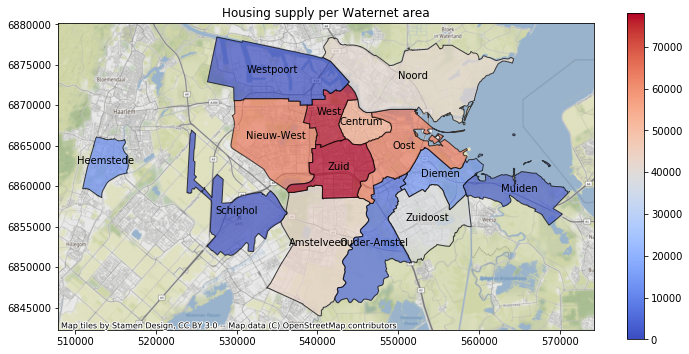

In [166]:
data = scope[['regionaam', 'woningvoorraad', 'geometry']]
ax = data.plot(column='woningvoorraad', edgecolor='k', cmap='coolwarm', figsize=(12, 12), alpha=0.7, legend=True,\
    legend_kwds={'shrink': 0.5})
ctx.add_basemap(ax, zoom=12)

for i, geo in data.centroid.iteritems():
    ax.annotate(s=data.regionaam[i], xy=[geo.x, geo.y], ha='center')

fig = ax.get_figure()
ax.set_title('Housing supply per Waternet area')
plt.show()